# GANS


I want to understand GANS so I can use to to data augmentation on tabular data or spot bad predictions.

**GOAL:** 
    
1. Understand GANS big picture 
1. How to initialze the DNNs
1. Why to use binary cross entropy loss
1. Simple explanation
1. Have tensorflow code

refs:

* https://debuggercafe.com/introduction-to-generative-adversarial-networks-gans/ <== looks good
    * https://debuggercafe.com/vanilla-gan-pytorch/ <== short version
* https://towardsdatascience.com/gans-generative-adversarial-networks-an-advanced-solution-for-data-generation-2ac9756a8a99
* https://towardsdatascience.com/fundamentals-of-generative-adversarial-networks-b7ca8c34f0bc#:~:text=What%20are%20GANs%2C%20and%20what,photos%20of%20more%20handwritten%20digits.
* https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29
* https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/
* https://arxiv.org/pdf/1406.2661.pdf <== paper
*  https://mafda.medium.com/gans-generative-adversarial-network-with-mnist-part-db8b9c061de0
* https://www.safwan.xyz/Vanilla-GAN/ <= with the algo in pseud code


In [1]:
!hostname 
!ls

LFERNANDES-LT
2023-02-10-lhof-data_augmentation_for_tabular_data_n_regression_using_gans.ipynb
2023-02-10-lhof-study_GANS.ipynb
test.py


# Intro

A Generative Adversarial Network (GAN) is a deep learning technique used for generating new data similar to existing data. It consists of two neural networks:

1. Generator: The generator goal is to learn how to generate sysnthectic data. We say the generator learns the data distribution
1. Discriminator: The discriminator goals is to distinguish between real data and the synsthetic data


The NN are trained in a way that the Generator try to fools the Discriminator to label the data produced by the Generator as real (zero-sum game). The Discriminator tries to correctly label the Generator output as fake (synthetic data). At the begining of training both NN commit a lot of error since they are still learning. But up to certain point, the quality of the output of the Generator increase and also the Discriminator becomes better and hard to be fooled.

GANs has many applications in the industry:
1. Image, Video and audio generations: application on social media, advertisemenst and entertainment industry. Widely used i social media
1. Data augmentation: Help training other MAchine learnings models. Many task that utilizes GANs for increase the the data size of the minority classes acheive SOTA performance. Ex:
    * CIFAR-10: paper "Improved Training of Wasserstein GANs," Arjovsky et al. (2017) and "BigGAN: Large Scale GAN Training for High Fidelity Natural Image Synthesis," Brock et al. (2018) 
    * Medical imaging: "Adversarial deep structured nets for mass segmentation from mammograms" by Li et al. (2019), Synthesizing medical images for augmented reality training data using generative adversarial networks" by Yang et al. (2018)  and "Improving medical image segmentation via adversarial training and perceptual similarity metrics" by Zhang et al. (2018)
1. Anomaly detection: Achieve SOTA performance 
    * Credit Card Fraud Detection
    * paper "Generating Synthetic Tabular Data using Generative Adversarial Networks," Wang et al. (2019) 



In the figure below is an example of GANS archictectur for generating handwritten digits using the public mnist digit database 

* It is reccomended that the input noisy size matches images sizes
    * Smaller: the generator may not have enough information to create a high-quality image
    * Larger: he generator may have too much information, leading to overfitting and producing similar images repeatedly
    

* Generator and Discrminator DNN size
    * relative size and complexity of the generator and discriminator can affect the performance and stability of the GAN.
    * discriminator is much larger and more complex than the generator, it may be able to easily identify and reject the generated samples. This result in the generator failing to learn and producing low-quality samples
    * if the generator is much larger and more complex than the discriminator, it may be able to generate realistic-looking samples that can fool the discriminator, but at the cost of requiring more training time and computational resources.


<img src="images/gans.png" alt="GANS">

During training, GANs alternate between updating the discriminator to better distinguish real from generated images, and updating the generator to produce more realistic images that fool the discriminator.
The discriminator and generators have different losses (Because they are performing different tasks). The classifier nature of the discriminator impose loss related to binary classification or multiclass classifications while the generator  has a special loss that takes the discriminator predictions into account. Usually, discriminator loss decreases rapidly compared to the generator and then generator catch ups. Usually the discriminator loss increases (not mandatory) at the end keep stable.

* GANS loss (formal equation)

$
$L_{GAN}(G,D) = E_{x \sim p_{data}(x)}[\log D(x)] + E_{z \sim p_z(z)}[\log(1-D(G(z))]$
$


where:
* $G$ is the generator and $D$ is the discriminator
* $G(z)$ is the generator output (fake image)
* $x$ is real data (real image) drawn from the true data distribution $p_{data}$ ($x \sim p_{data}$)
* $z$ is random noise data drawn from a **prior** distribution $p_z$ ($z \sim p_z$)
* $E$ is the expectation operaor ("The mean")

Bellow is a discussion of the equation above. It is the **GANS loss big picture equation**:

$
L(G, D) = E_x[log(D(x))] + E_z[log(1 - D(G(z)))]
$

where:
* $G$ is the generator and $D$ is the discriminator 
* $x$ is the true images 
* $z$ is noise data for generating fake images
* $E$ is the expectation operator ("The mean")


The first term $ E_x[log(D(x))]$ is related to the probability of the discriminator (log-likelihood of the discriminator) detect an image is true given the image is true. Training find the parameters of the discriminator that maximize that term. The discriminator is encouraged to maximize the probablity of detected treu images. 

The second term is related to the ability of the generator to foo the discriminator (log-likelihood of the discriminator incorrectly classifying a fake image as true). **Maximize** that ability of the generator ecncourage the generator creates more realistic images to foo the discriminator. This is the same of **minimize** the probability of be detected by the discriminator (the probability that the discriminator correctly classifies generated samples as fake).


The choice of prior distribution can have a significant impact on the quality and diversity of the generated samples. Using a non-uniform prior distribution, such as a normal distribution ($z \sim N(0,1)$), is that it can help the generator to focus on specific regions of the data distribution where the most important features are located. For example, if the data distribution has a specific shape or structure, the prior distribution can be designed to reflect this structure and guide the generator to generate more realistic samples.Most common common priori distribution is the uniform $z \sim U(0,1)$, but different authors use: Normal, Bernouli, Multivariate Normal Distribution and Laplacian Distribution. 




# Load requirements

In [2]:
import IPython
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Image

InteractiveShell.ast_node_interactivity = "all"
print("agor vai")

import nbformat
from nbformat import v4

agor vai


In [3]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

2023-02-26 06:55:19.155603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 06:55:19.282570: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-26 06:55:19.288146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-26 06:55:19.288161: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

```sh
pip install nbformat
```

In [6]:
# # save the current notebook
# nb = v4.new_notebook()
# nbformat.write(nb, open('2023-02-10-lhof-study_GANS-v1.ipynb', 'w'), version=4)

# Load data

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# summarize the shape of the dataset
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (60000, 28, 28, 1) (60000,)
Test (10000, 28, 28) (10000,)


8

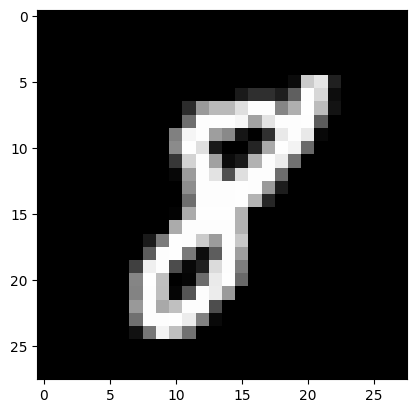

In [8]:

# plot raw pixel data
#pyplot.imshow(trainX[i], cmap='gray')
k = 17
y_train[k]
plt.imshow(x_train[k], cmap='gray')

# Preprocessing


1. Need to 

In [9]:
pass

# Discriminator

In [10]:
import pydot

def discriminator_model(in_shape=(28,28,1)):

    model =  tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # compile model
    opt =  tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

discriminator = discriminator_model()

discriminator.summary()
#plot_model(discriminator, show_shapes=True, show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2023-02-26 07:00:15.705337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-26 07:00:15.705368: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-26 07:00:15.705392: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ds-vm-leandro2): /proc/driver/nvidia/version does not exist
2023-02-26 07:00:15.705652: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/leandro_fernandes/.venvs/gans-env/lib/python3.9/site-packages/keras/optimizers/opt

# Generator 

In [11]:
def generator_model(latent_dim = 100):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape=(latent_dim,)),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(28 * 28 * 1, activation='tanh'),
        tf.keras.layers.Reshape((28, 28, 1))
    ])

    return model
latent_dim = 100
generator = generator_model(latent_dim)

# Compiling the generator
generator.compile(loss='binary_crossentropy', optimizer='adam')

generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 114,576
Trainable params: 114,320
Non-trainable params: 256
______________________________________________

# GANS

In [12]:
discriminator.trainable = False

gans = tf.keras.Sequential([generator,discriminator])

opt =  tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
gans.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [13]:
gans.layers

gans.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         114576    
                                                                 
 sequential (Sequential)     (None, 1)                 40705     
                                                                 
Total params: 155,281
Trainable params: 114,320
Non-trainable params: 40,961
_________________________________________________________________


# Training

In [14]:
batch_size = 1024*3

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

smooth = 0.1

i = 0
# Train Discriminator weights
discriminator.trainable = True
        
# Real samples
X_batch = x_train[i*batch_size:(i+1)*batch_size]
d_loss_real = discriminator.train_on_batch(x=X_batch, y=real)
        
# Fake Samples
z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
X_fake = generator.predict_on_batch(z)
d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
# Discriminator loss
d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
# Train Generator weights
discriminator.trainable = False
d_g_loss_batch = gans.train_on_batch(x=z, y=real)

print("Finish him")

Finish him


In [15]:
def train_gan(gan, discriminator, generator, x_train, epochs=30, batch_size=64, latent_dim=100):

    history = {'discriminator': {'loss': [], 'accuracy': []}, 'generator': {'loss': [], 'accuracy': []}}
    for epoch in range(epochs):
        
        for i in range(x_train.shape[0] // batch_size):

            # Select a random batch of images
            idxs  = np.random.randint(low=0,high=x_train.shape[0],size=batch_size)
            real_images = x_train[idxs]
            
            # Generate fake images
            noise = np.random.normal(0, 1,size=[batch_size, latent_dim])
            fake_images = generator.predict(noise,verbose=False)
            
            # Combine real and fake images
            x = np.concatenate([real_images, fake_images])
            
            # Labels for real and fake images
            y = np.ones(2 * batch_size)
            y[batch_size:] = 0
            
            # Train the discriminator
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(x, y)
            
            # Train the generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            y = np.ones(batch_size)
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y)

        if epoch % 50 == 0:
            samples = 3
            # Generate fake images to visualize progress
            noise = np.random.normal(0, 1, (samples, latent_dim))
            fake_images = generator.predict(noise,verbose=False)

            # Plot the fake images
            plt.figure(figsize=(10, 10))
            for i in range(samples):
                plt.subplot(1, samples, i + 1)
                plt.imshow(fake_images[i, :, :, 0], cmap='gray')
                plt.axis('off')
        
        # Save the losses and accuracies
        history['discriminator']['loss'].append(d_loss[0])
        history['discriminator']['accuracy'].append(d_loss[1])
        history['generator']['loss'].append(g_loss[0])
        history['generator']['accuracy'].append(g_loss[1])

        # Print the progress
        print("Epoch:", epoch + 1, 
            f"Generator Loss: {g_loss[0]:.4f}", f"Generator Accuracy: {g_loss[1]:.1%}", 
            f"Discriminator Loss: {d_loss[0]:.4f}", f"Discriminator Accuracy: {d_loss[1]:.1%}")

    return history


In [16]:
batch_size
x_train.shape
x_train.shape[0]//batch_size


3072

(60000, 28, 28, 1)

19

Epoch: 1 Generator Loss: 0.8169 Generator Accuracy: 1.7% Discriminator Loss: 0.5749 Discriminator Accuracy: 100.0%
Epoch: 2 Generator Loss: 1.3511 Generator Accuracy: 0.0% Discriminator Loss: 0.3302 Discriminator Accuracy: 100.0%
Epoch: 3 Generator Loss: 2.0960 Generator Accuracy: 0.0% Discriminator Loss: 0.1444 Discriminator Accuracy: 100.0%
Epoch: 4 Generator Loss: 2.2792 Generator Accuracy: 1.4% Discriminator Loss: 0.0875 Discriminator Accuracy: 100.0%
Epoch: 5 Generator Loss: 2.1562 Generator Accuracy: 7.9% Discriminator Loss: 0.0916 Discriminator Accuracy: 99.8%
Epoch: 6 Generator Loss: 2.0958 Generator Accuracy: 12.3% Discriminator Loss: 0.1219 Discriminator Accuracy: 98.9%
Epoch: 7 Generator Loss: 1.9585 Generator Accuracy: 16.1% Discriminator Loss: 0.1530 Discriminator Accuracy: 97.3%
Epoch: 8 Generator Loss: 1.7719 Generator Accuracy: 21.3% Discriminator Loss: 0.2100 Discriminator Accuracy: 93.7%
Epoch: 9 Generator Loss: 1.6079 Generator Accuracy: 23.0% Discriminator Loss: 0.2

Epoch: 73 Generator Loss: 2.2571 Generator Accuracy: 7.4% Discriminator Loss: 0.2102 Discriminator Accuracy: 92.5%
Epoch: 74 Generator Loss: 2.3556 Generator Accuracy: 6.6% Discriminator Loss: 0.2058 Discriminator Accuracy: 92.8%
Epoch: 75 Generator Loss: 2.3287 Generator Accuracy: 7.1% Discriminator Loss: 0.2110 Discriminator Accuracy: 92.6%
Epoch: 76 Generator Loss: 2.3120 Generator Accuracy: 7.0% Discriminator Loss: 0.2093 Discriminator Accuracy: 92.5%
Epoch: 77 Generator Loss: 2.2713 Generator Accuracy: 8.0% Discriminator Loss: 0.1998 Discriminator Accuracy: 92.8%
Epoch: 78 Generator Loss: 2.3803 Generator Accuracy: 6.2% Discriminator Loss: 0.1953 Discriminator Accuracy: 93.2%
Epoch: 79 Generator Loss: 2.6227 Generator Accuracy: 4.1% Discriminator Loss: 0.2039 Discriminator Accuracy: 92.9%
Epoch: 80 Generator Loss: 2.3856 Generator Accuracy: 6.8% Discriminator Loss: 0.1943 Discriminator Accuracy: 93.5%
Epoch: 81 Generator Loss: 2.6903 Generator Accuracy: 3.8% Discriminator Loss: 0.

/tmp/ipykernel_517965/3816604119.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


Epoch: 101 Generator Loss: 2.9735 Generator Accuracy: 2.9% Discriminator Loss: 0.1540 Discriminator Accuracy: 95.3%
Epoch: 102 Generator Loss: 2.9130 Generator Accuracy: 3.3% Discriminator Loss: 0.1584 Discriminator Accuracy: 94.6%
Epoch: 103 Generator Loss: 2.9196 Generator Accuracy: 3.2% Discriminator Loss: 0.1524 Discriminator Accuracy: 95.3%
Epoch: 104 Generator Loss: 2.8402 Generator Accuracy: 3.8% Discriminator Loss: 0.1553 Discriminator Accuracy: 94.5%
Epoch: 105 Generator Loss: 2.9378 Generator Accuracy: 3.3% Discriminator Loss: 0.1519 Discriminator Accuracy: 95.1%
Epoch: 106 Generator Loss: 3.0759 Generator Accuracy: 2.7% Discriminator Loss: 0.1502 Discriminator Accuracy: 95.2%
Epoch: 107 Generator Loss: 2.9368 Generator Accuracy: 3.2% Discriminator Loss: 0.1533 Discriminator Accuracy: 95.2%
Epoch: 108 Generator Loss: 2.8879 Generator Accuracy: 4.0% Discriminator Loss: 0.1444 Discriminator Accuracy: 95.1%
Epoch: 109 Generator Loss: 3.0378 Generator Accuracy: 3.4% Discriminator

Epoch: 172 Generator Loss: 3.8744 Generator Accuracy: 2.2% Discriminator Loss: 0.1063 Discriminator Accuracy: 96.5%
Epoch: 173 Generator Loss: 4.3402 Generator Accuracy: 1.5% Discriminator Loss: 0.1083 Discriminator Accuracy: 96.5%
Epoch: 174 Generator Loss: 3.8483 Generator Accuracy: 2.2% Discriminator Loss: 0.1115 Discriminator Accuracy: 96.2%
Epoch: 175 Generator Loss: 3.9180 Generator Accuracy: 2.2% Discriminator Loss: 0.1202 Discriminator Accuracy: 95.7%
Epoch: 176 Generator Loss: 3.8465 Generator Accuracy: 2.2% Discriminator Loss: 0.1027 Discriminator Accuracy: 96.5%
Epoch: 177 Generator Loss: 3.8124 Generator Accuracy: 2.4% Discriminator Loss: 0.0971 Discriminator Accuracy: 97.2%
Epoch: 178 Generator Loss: 3.8025 Generator Accuracy: 2.2% Discriminator Loss: 0.1093 Discriminator Accuracy: 96.1%
Epoch: 179 Generator Loss: 3.7039 Generator Accuracy: 2.6% Discriminator Loss: 0.1062 Discriminator Accuracy: 96.7%
Epoch: 180 Generator Loss: 3.3984 Generator Accuracy: 4.0% Discriminator

Epoch: 243 Generator Loss: 4.5736 Generator Accuracy: 2.8% Discriminator Loss: 0.0929 Discriminator Accuracy: 96.6%
Epoch: 244 Generator Loss: 5.0867 Generator Accuracy: 1.3% Discriminator Loss: 0.0874 Discriminator Accuracy: 97.0%
Epoch: 245 Generator Loss: 4.4407 Generator Accuracy: 2.3% Discriminator Loss: 0.0964 Discriminator Accuracy: 96.4%
Epoch: 246 Generator Loss: 4.5432 Generator Accuracy: 2.2% Discriminator Loss: 0.0903 Discriminator Accuracy: 97.1%
Epoch: 247 Generator Loss: 5.0685 Generator Accuracy: 1.3% Discriminator Loss: 0.1007 Discriminator Accuracy: 96.5%
Epoch: 248 Generator Loss: 4.2926 Generator Accuracy: 3.0% Discriminator Loss: 0.1109 Discriminator Accuracy: 96.1%
Epoch: 249 Generator Loss: 4.6536 Generator Accuracy: 1.5% Discriminator Loss: 0.1045 Discriminator Accuracy: 96.0%
Epoch: 250 Generator Loss: 4.4993 Generator Accuracy: 2.2% Discriminator Loss: 0.0927 Discriminator Accuracy: 96.7%
Epoch: 251 Generator Loss: 4.6902 Generator Accuracy: 1.7% Discriminator

Epoch: 314 Generator Loss: 5.1012 Generator Accuracy: 0.9% Discriminator Loss: 0.0599 Discriminator Accuracy: 98.2%
Epoch: 315 Generator Loss: 5.0555 Generator Accuracy: 1.4% Discriminator Loss: 0.0604 Discriminator Accuracy: 98.0%
Epoch: 316 Generator Loss: 5.0650 Generator Accuracy: 1.4% Discriminator Loss: 0.0548 Discriminator Accuracy: 98.2%
Epoch: 317 Generator Loss: 5.3571 Generator Accuracy: 1.0% Discriminator Loss: 0.0573 Discriminator Accuracy: 98.2%
Epoch: 318 Generator Loss: 5.4752 Generator Accuracy: 0.8% Discriminator Loss: 0.0545 Discriminator Accuracy: 98.1%
Epoch: 319 Generator Loss: 5.4023 Generator Accuracy: 1.1% Discriminator Loss: 0.0558 Discriminator Accuracy: 98.3%
Epoch: 320 Generator Loss: 5.0416 Generator Accuracy: 1.5% Discriminator Loss: 0.0573 Discriminator Accuracy: 98.3%
Epoch: 321 Generator Loss: 5.2346 Generator Accuracy: 1.1% Discriminator Loss: 0.0594 Discriminator Accuracy: 98.1%
Epoch: 322 Generator Loss: 5.0175 Generator Accuracy: 1.2% Discriminator

Epoch: 385 Generator Loss: 5.9191 Generator Accuracy: 0.8% Discriminator Loss: 0.0500 Discriminator Accuracy: 98.4%
Epoch: 386 Generator Loss: 5.7513 Generator Accuracy: 1.1% Discriminator Loss: 0.0516 Discriminator Accuracy: 98.2%
Epoch: 387 Generator Loss: 6.1358 Generator Accuracy: 0.7% Discriminator Loss: 0.0359 Discriminator Accuracy: 99.0%
Epoch: 388 Generator Loss: 5.9867 Generator Accuracy: 0.8% Discriminator Loss: 0.0411 Discriminator Accuracy: 98.6%
Epoch: 389 Generator Loss: 6.0834 Generator Accuracy: 0.4% Discriminator Loss: 0.0428 Discriminator Accuracy: 98.6%
Epoch: 390 Generator Loss: 5.7266 Generator Accuracy: 1.0% Discriminator Loss: 0.0406 Discriminator Accuracy: 98.7%
Epoch: 391 Generator Loss: 6.1550 Generator Accuracy: 0.4% Discriminator Loss: 0.0403 Discriminator Accuracy: 98.6%
Epoch: 392 Generator Loss: 6.1535 Generator Accuracy: 0.6% Discriminator Loss: 0.0409 Discriminator Accuracy: 98.7%
Epoch: 393 Generator Loss: 6.2150 Generator Accuracy: 0.7% Discriminator

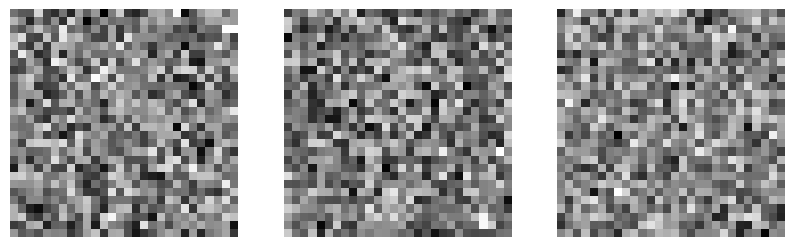

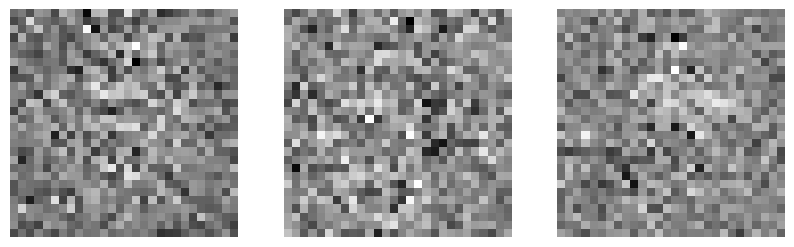

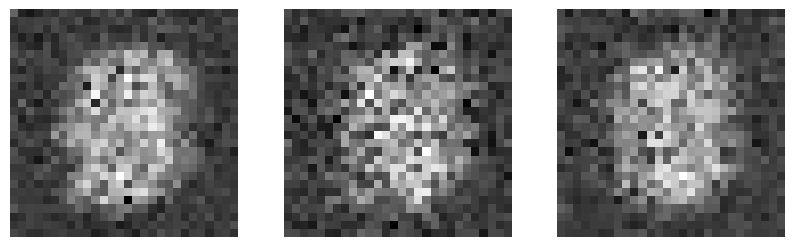

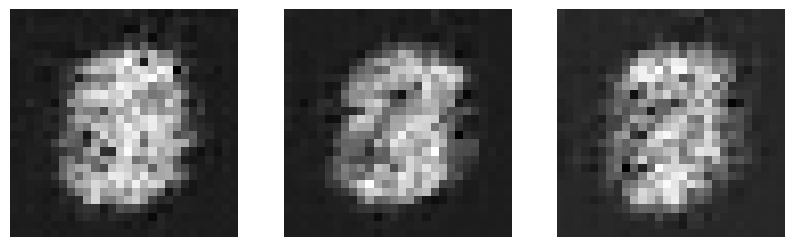

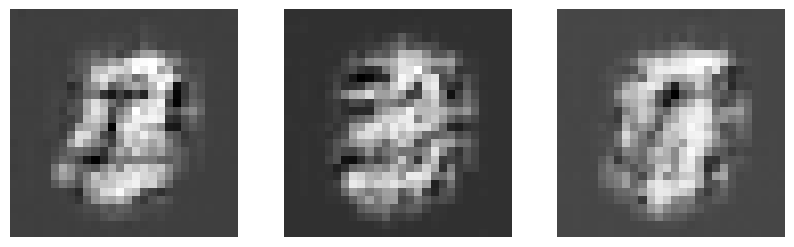

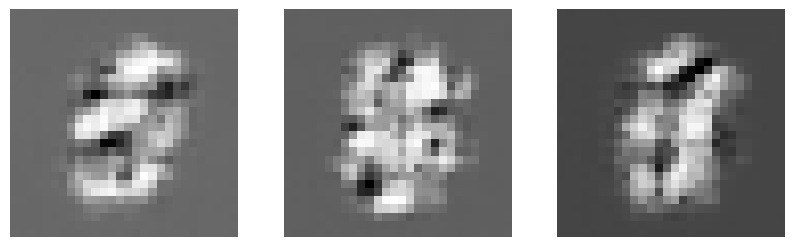

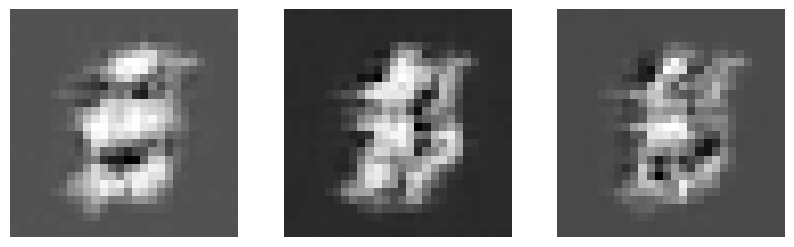

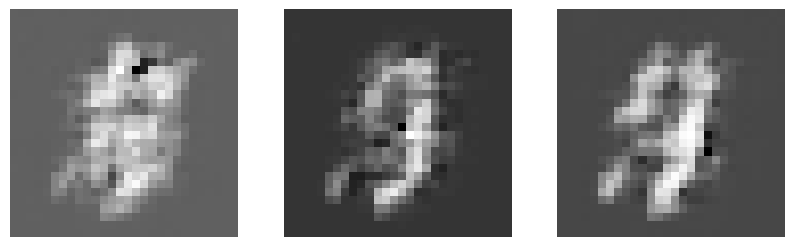

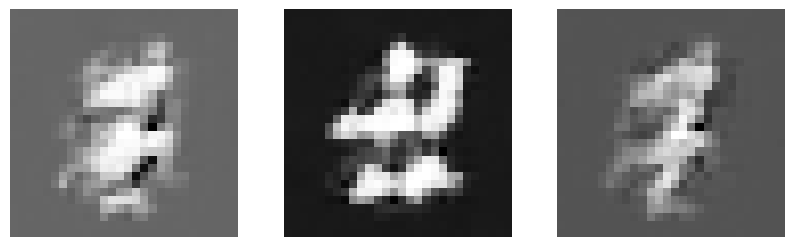

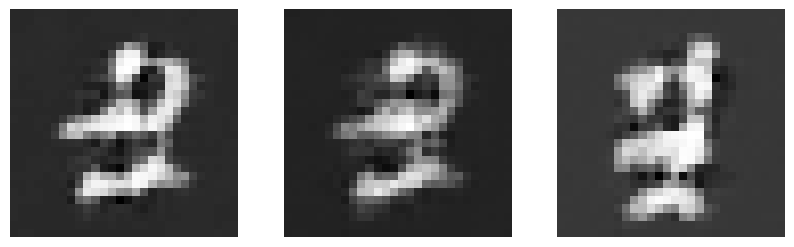

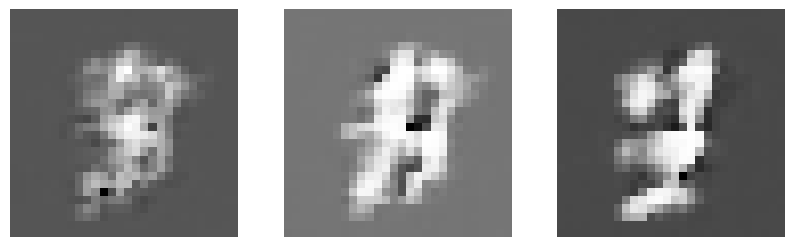

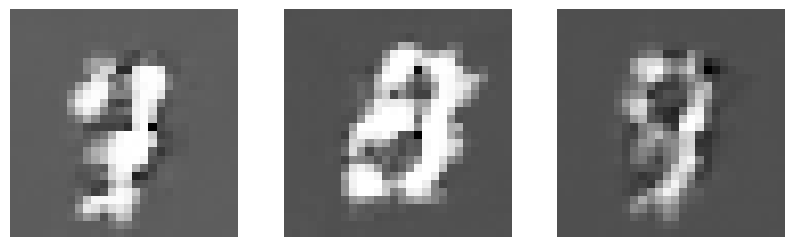

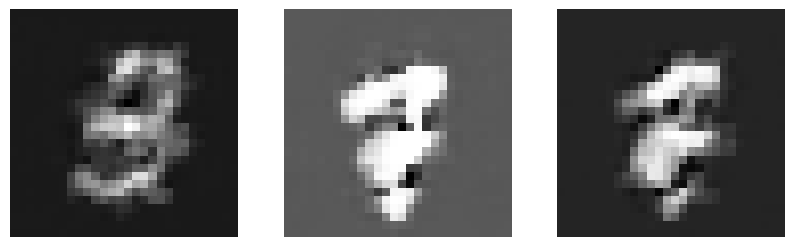

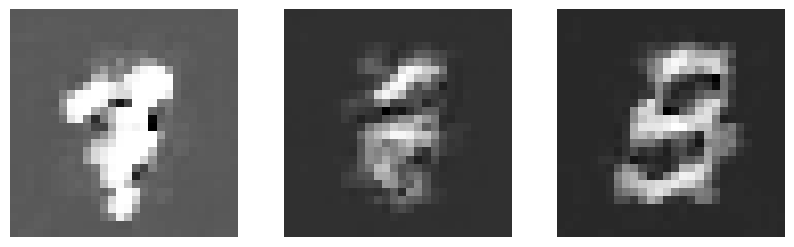

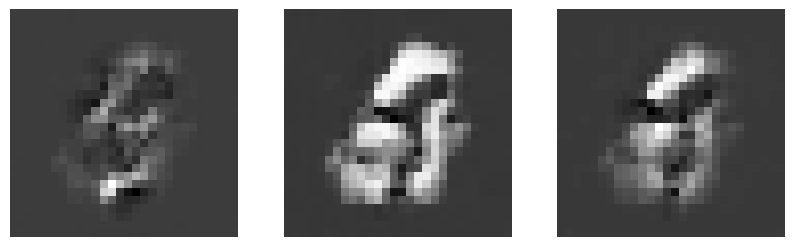

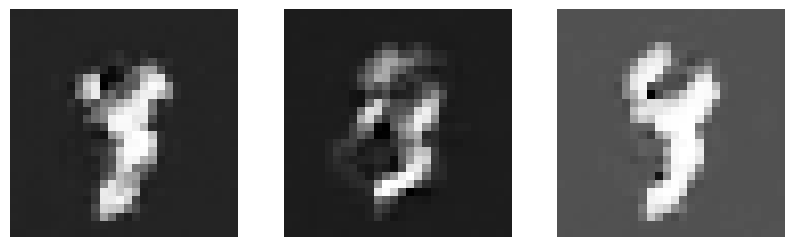

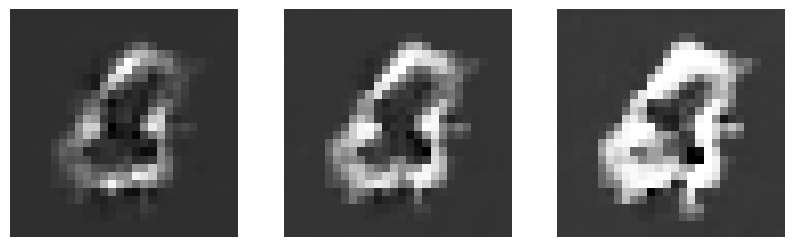

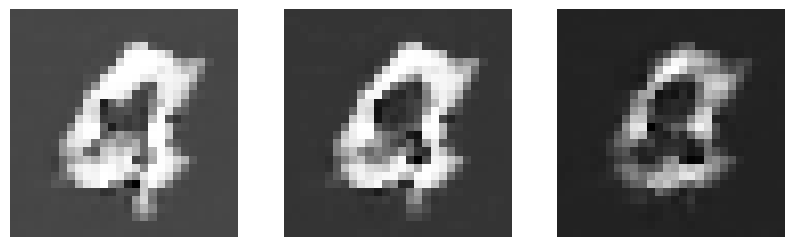

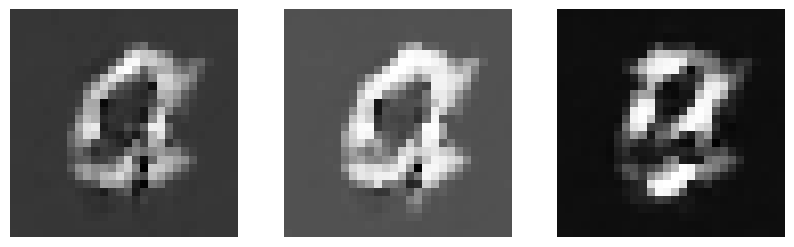

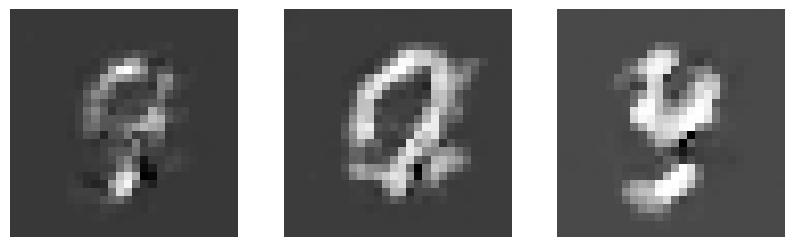

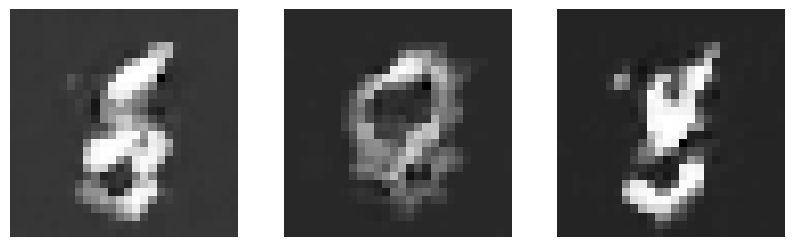

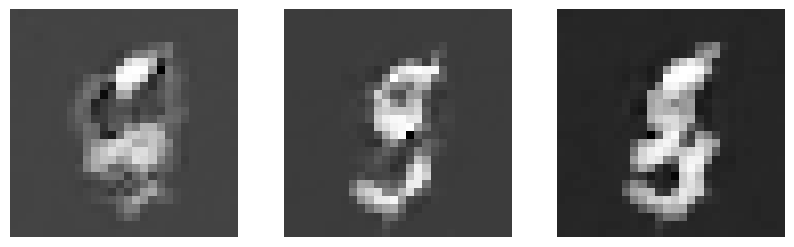

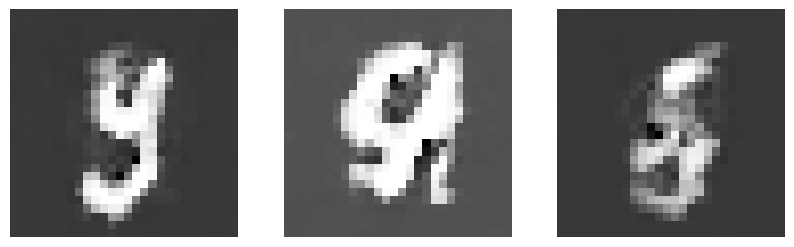

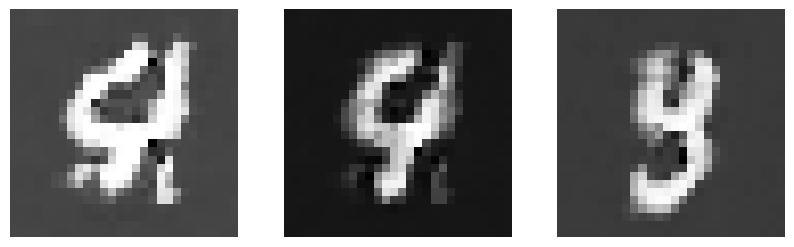

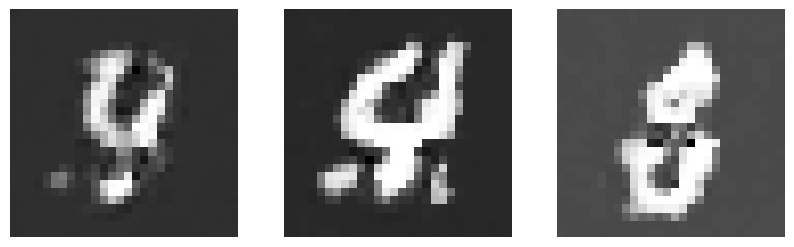

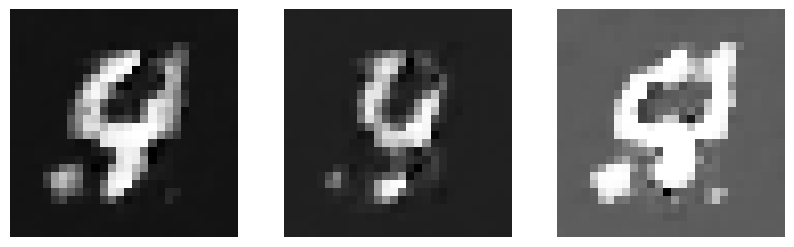

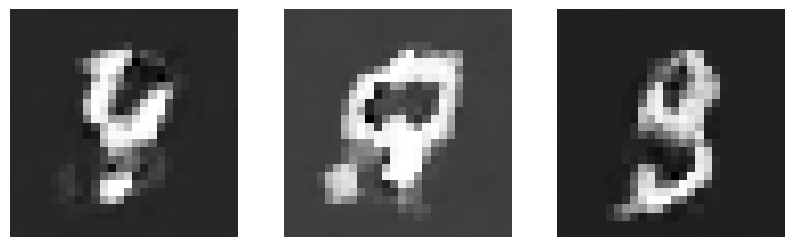

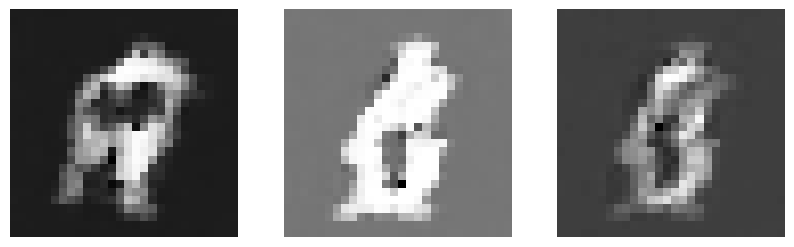

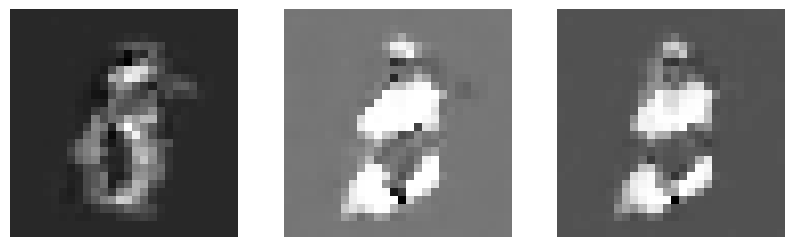

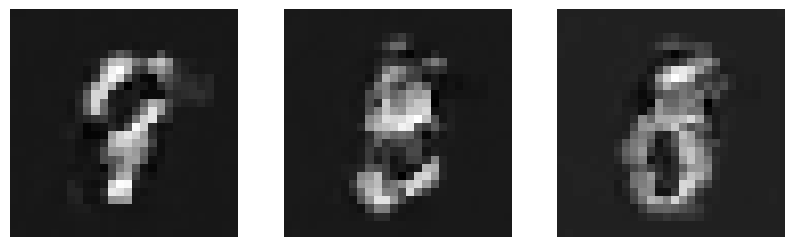

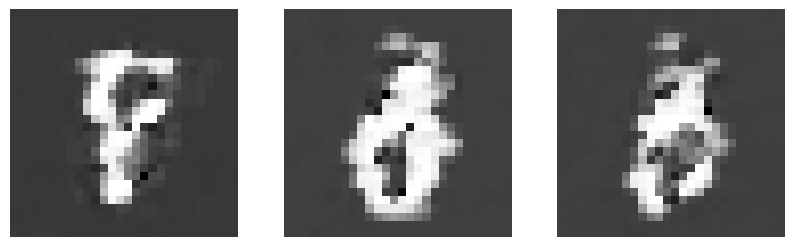

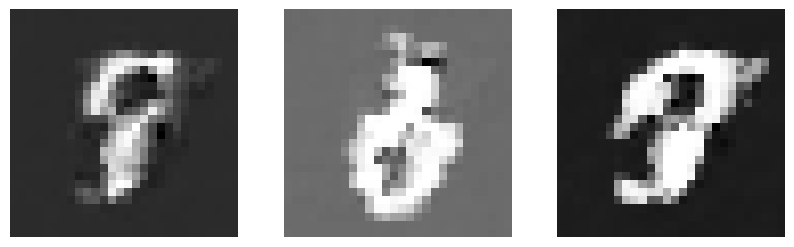

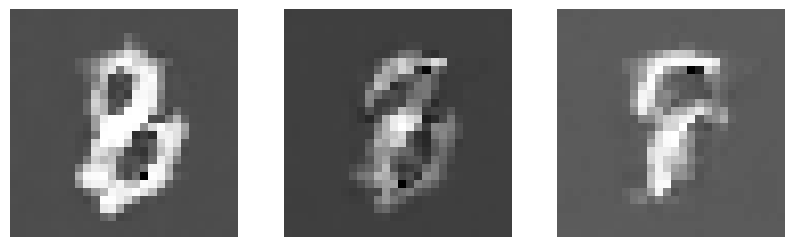

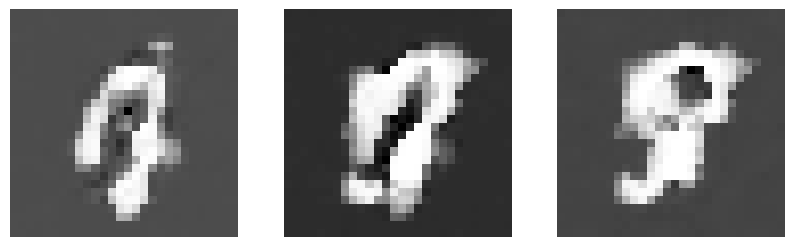

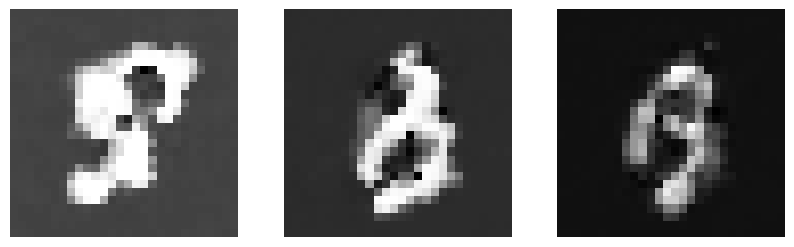

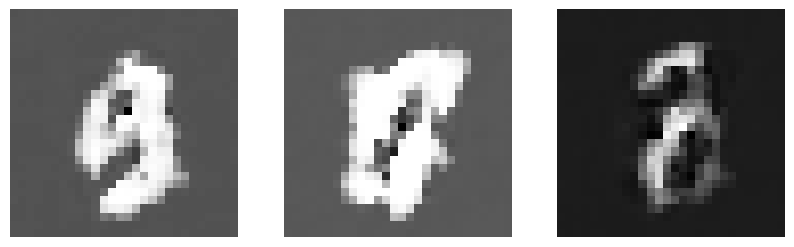

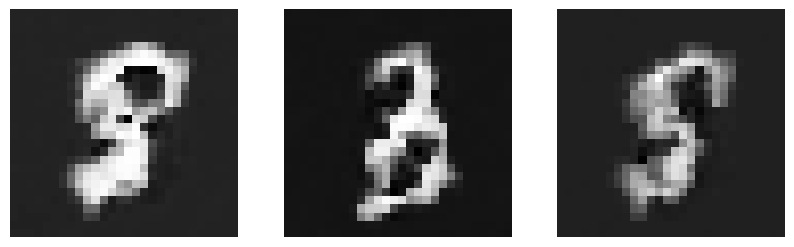

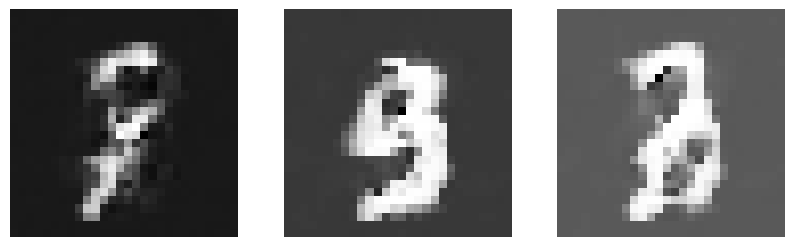

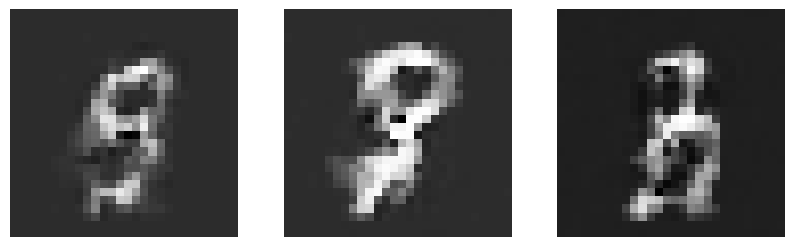

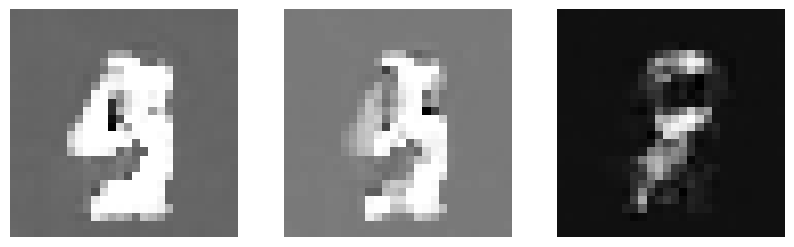

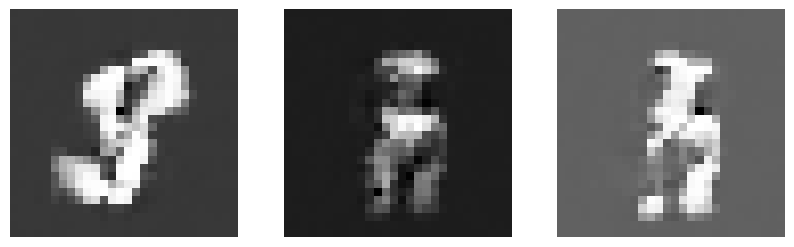

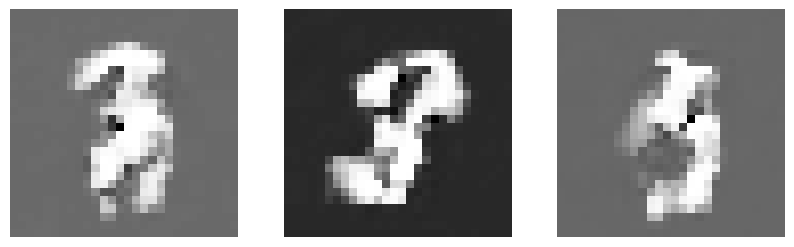

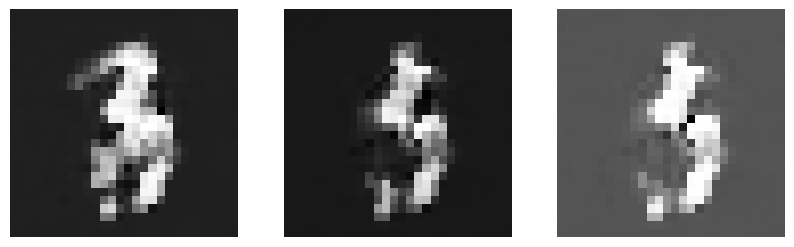

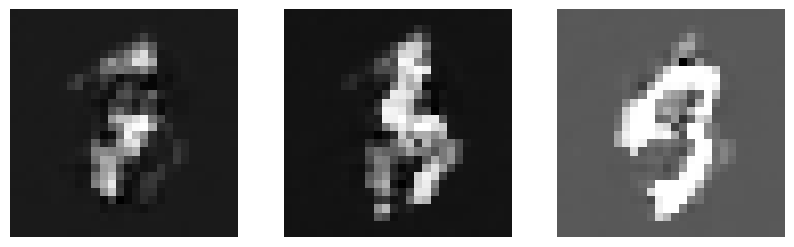

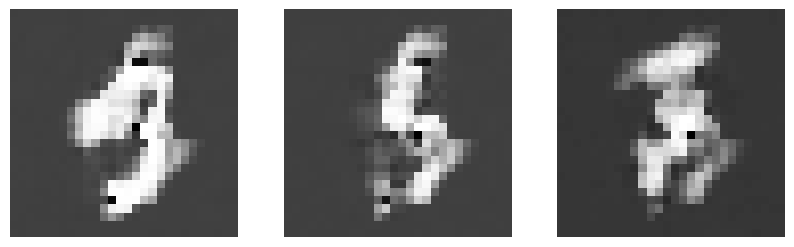

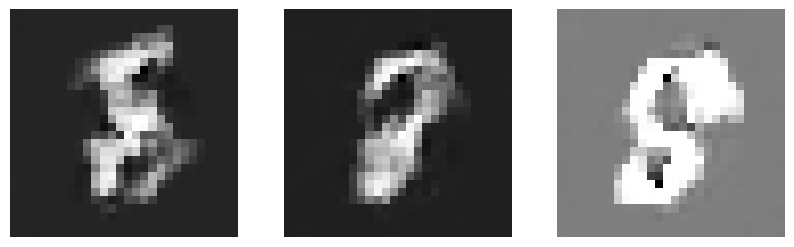

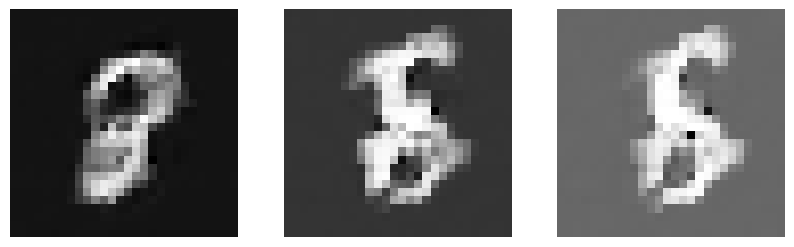

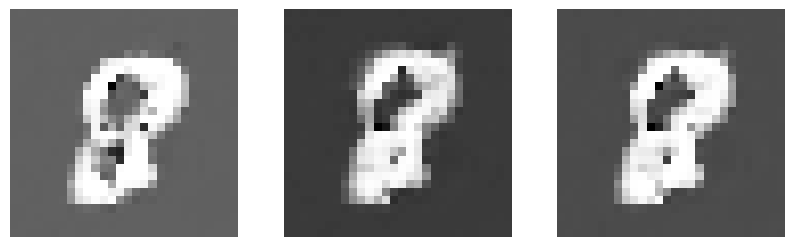

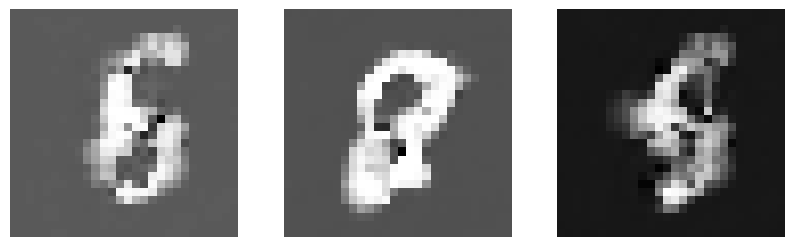

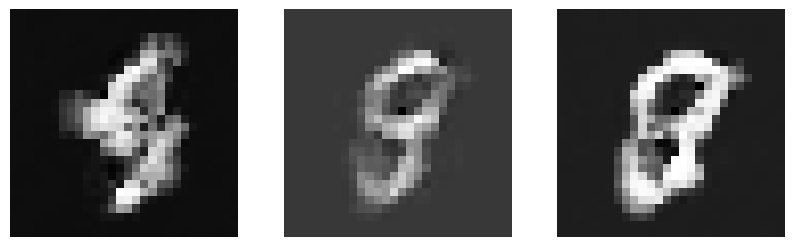

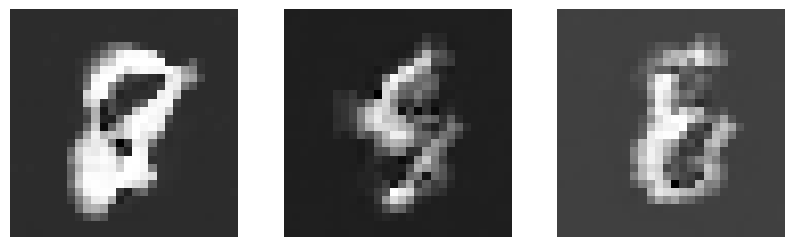

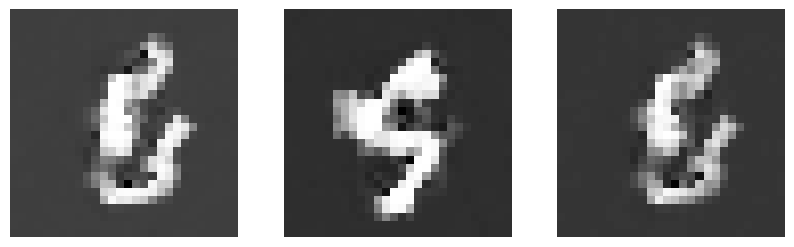

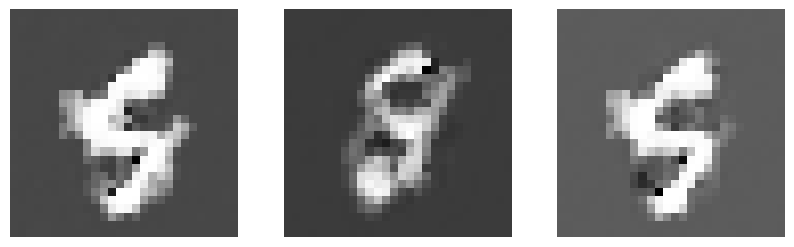

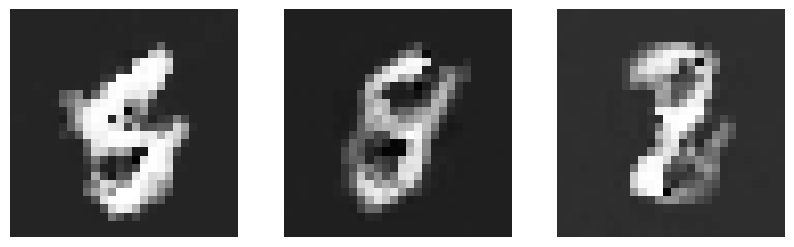

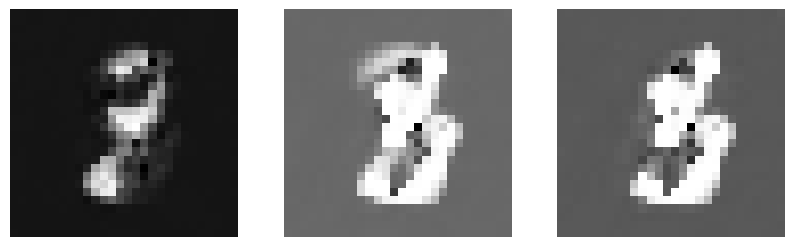

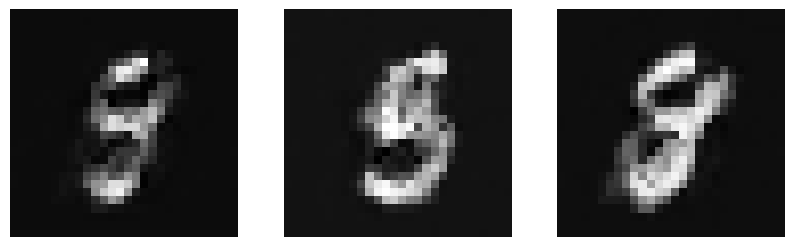

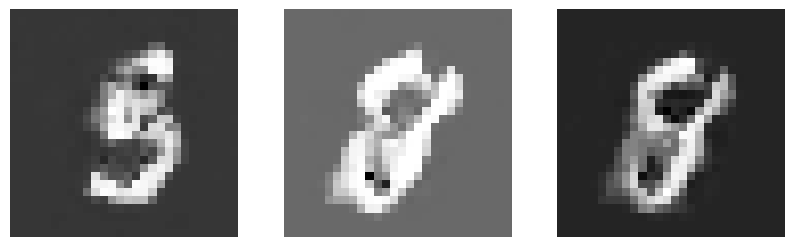

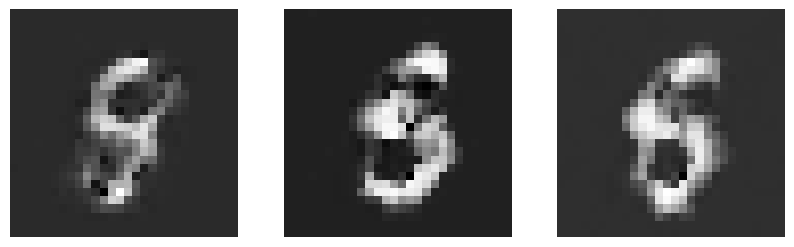

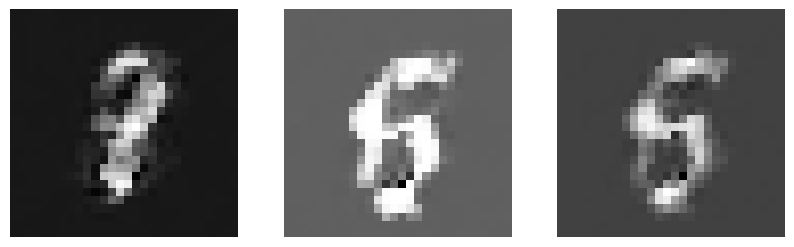

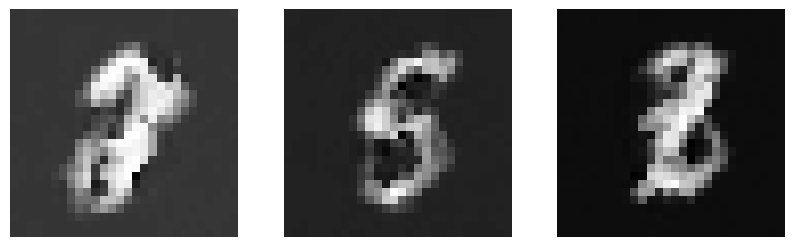

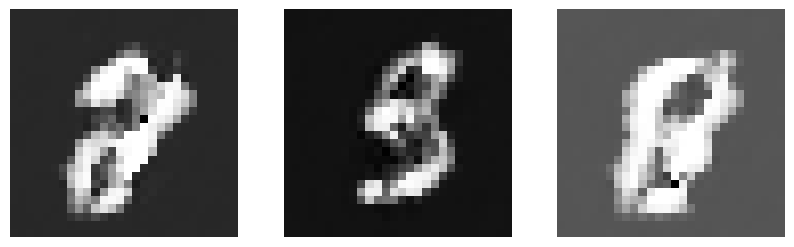

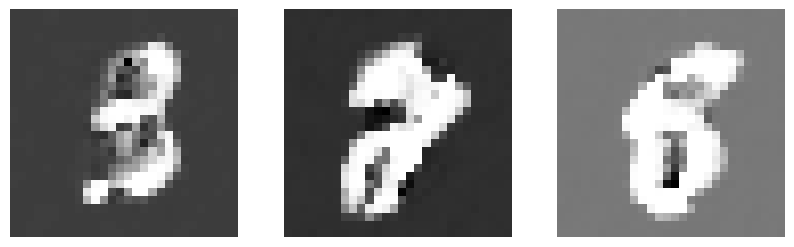

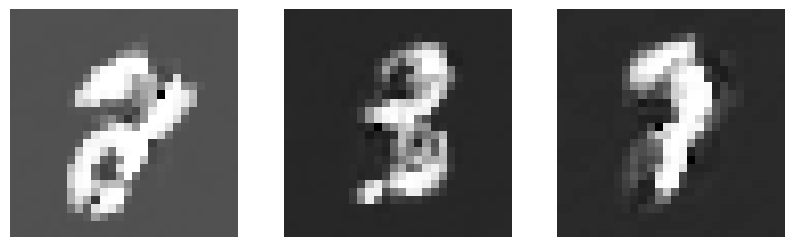

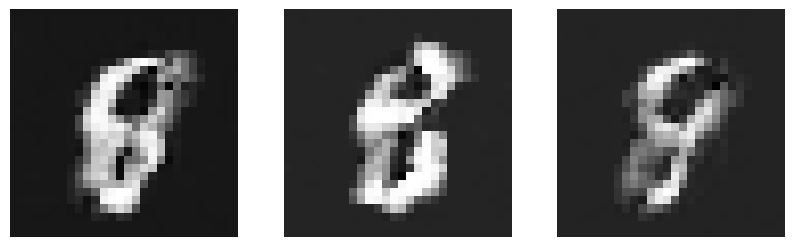

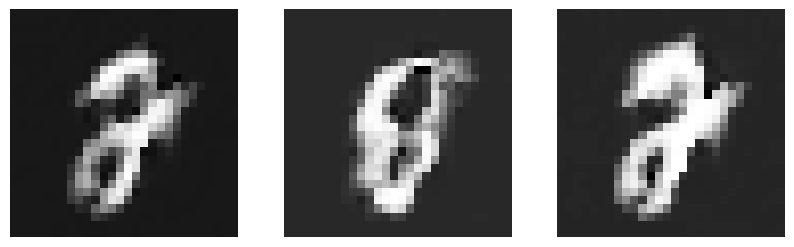

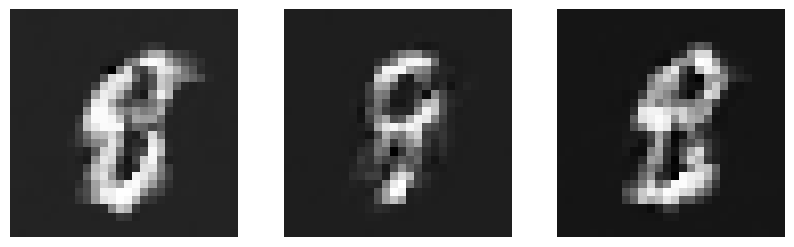

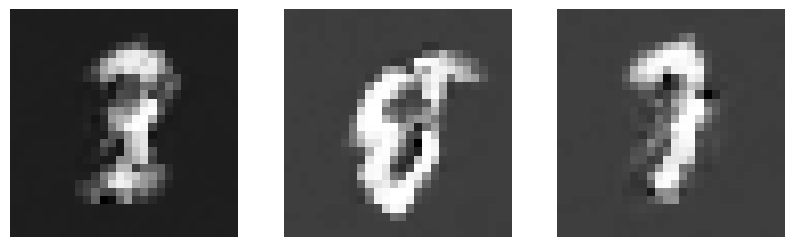

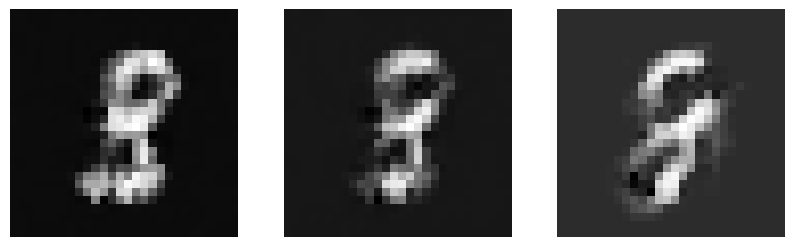

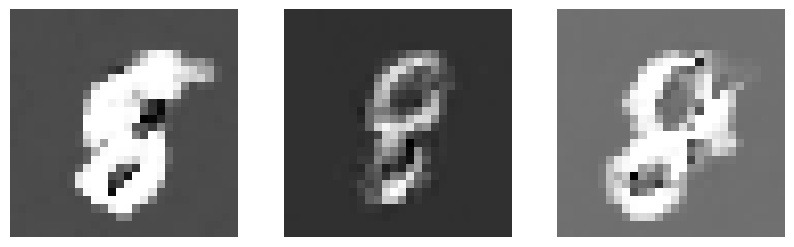

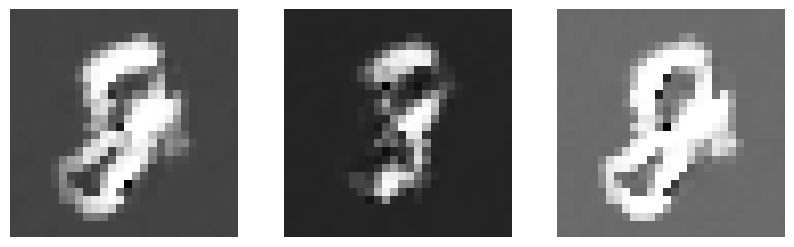

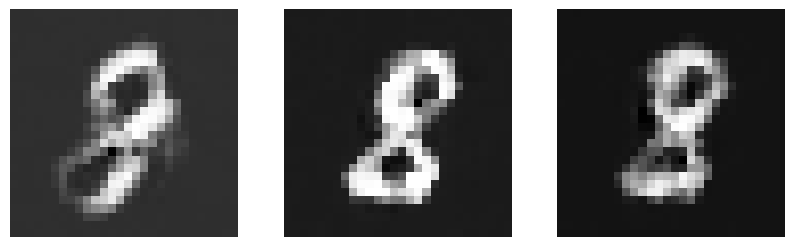

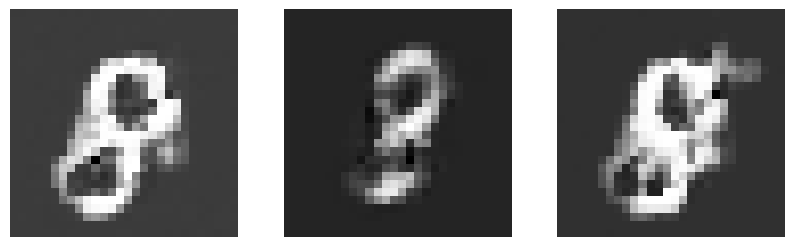

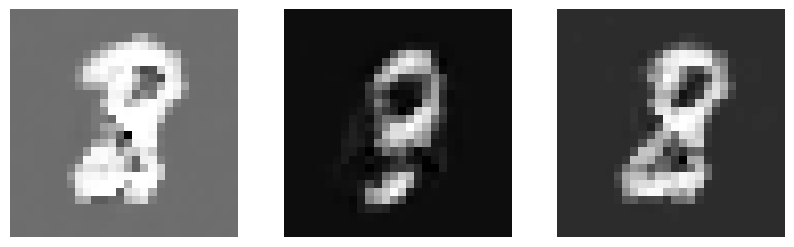

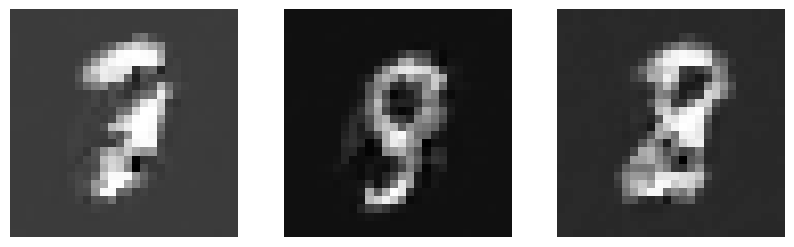

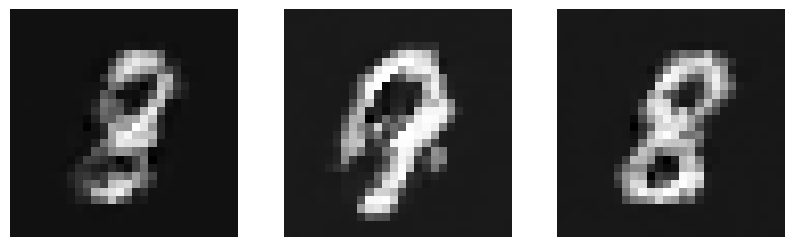

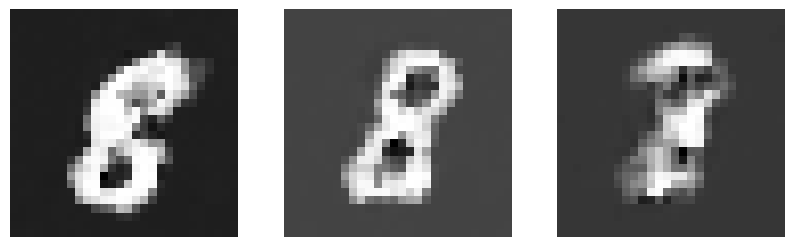

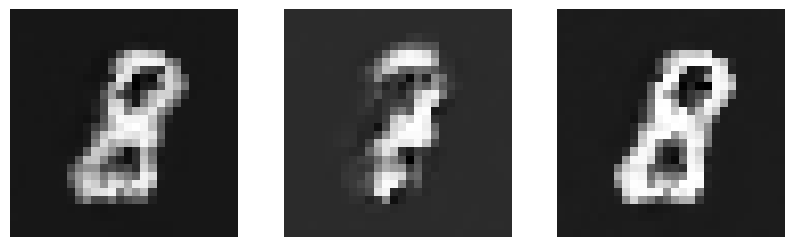

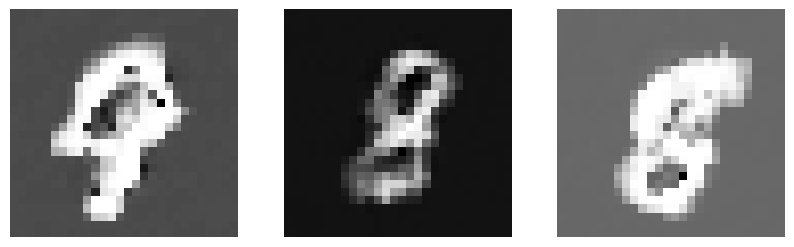

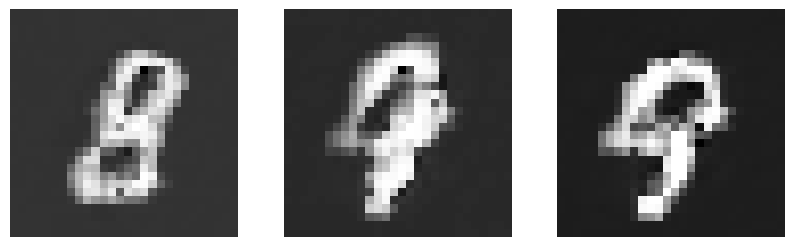

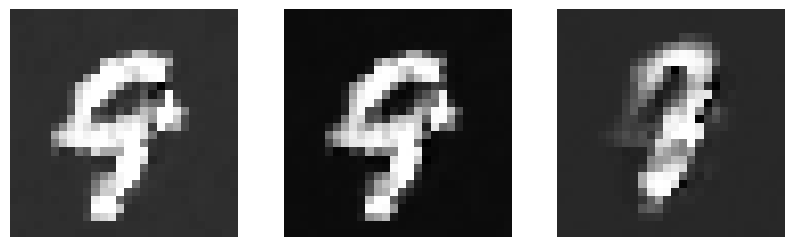

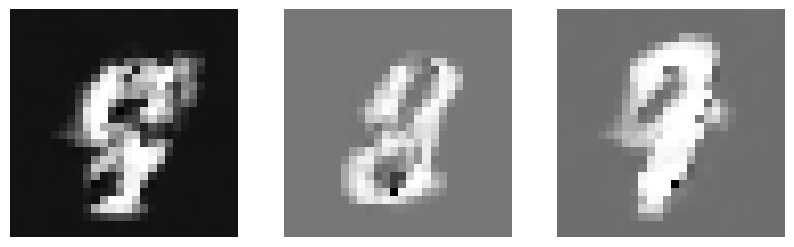

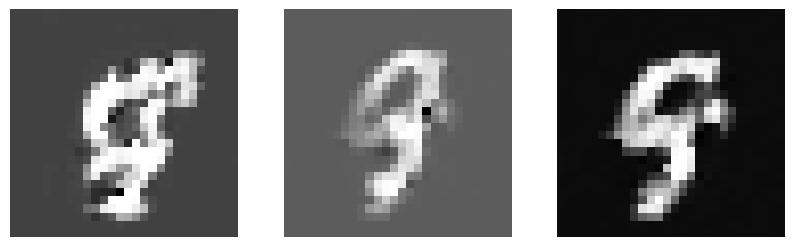

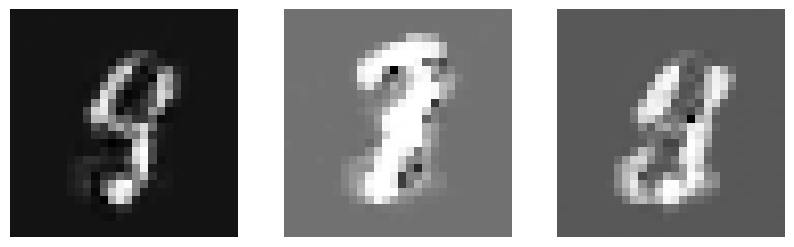

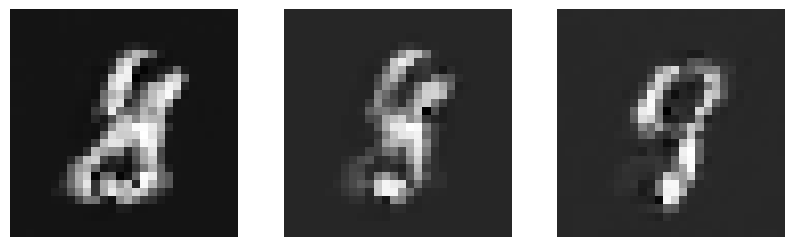

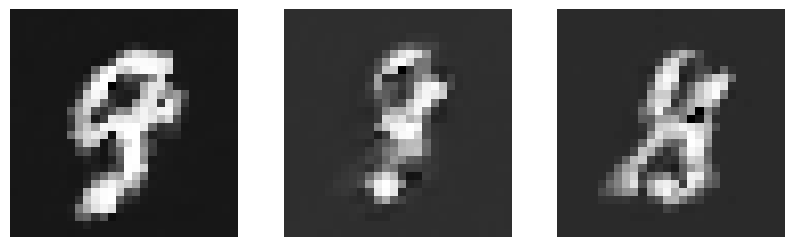

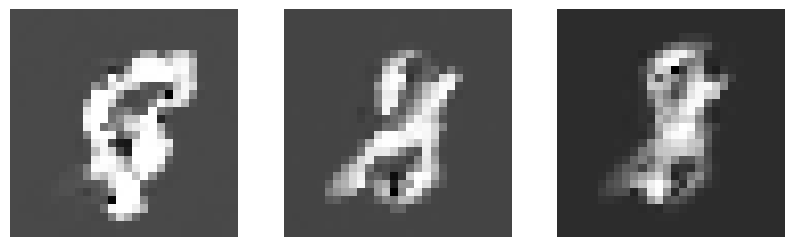

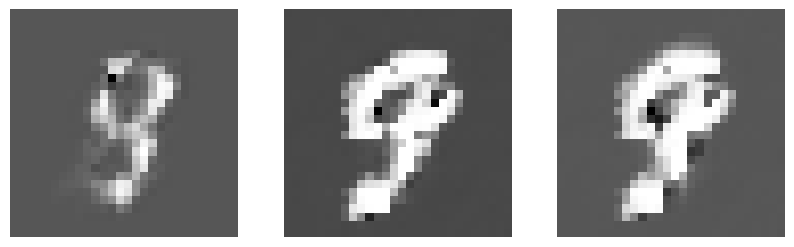

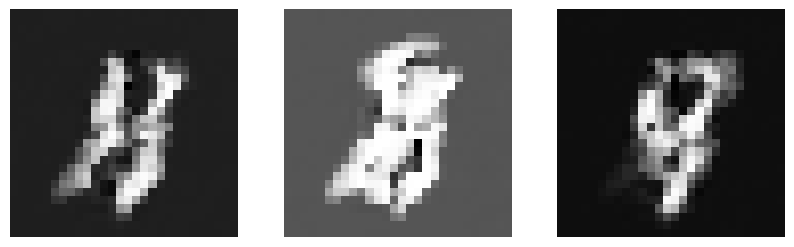

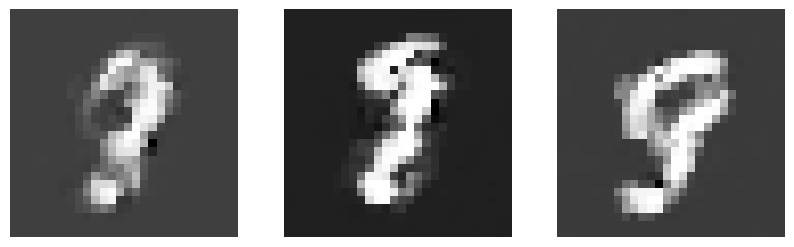

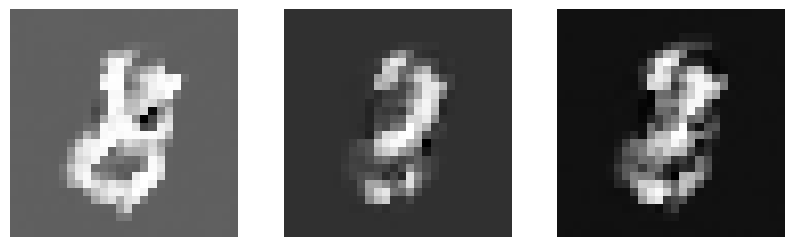

In [17]:
%%time
# Training the GAN
#train_gan(generator, discriminator, x_train)

history = train_gan(gans, discriminator, generator, x_train, epochs=450, batch_size=batch_size, latent_dim=latent_dim)

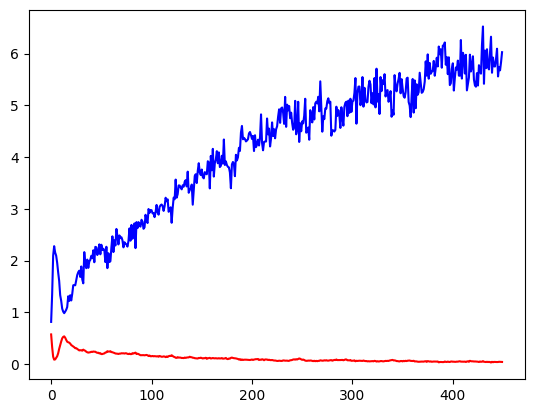

In [18]:
plt.plot(history['discriminator']['loss'], 'r')
plt.plot(history['generator']['loss'], 'b')

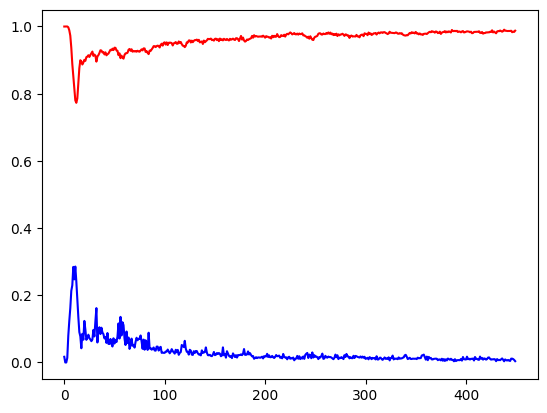

In [19]:
plt.plot(history['discriminator']['accuracy'], 'r')
plt.plot(history['generator']['accuracy'], 'b')

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: >

(-0.5, 27.5, 27.5, -0.5)

<AxesSubplot: >

(-0.5, 27.5, 27.5, -0.5)

<AxesSubplot: >

(-0.5, 27.5, 27.5, -0.5)

<AxesSubplot: >

(-0.5, 27.5, 27.5, -0.5)

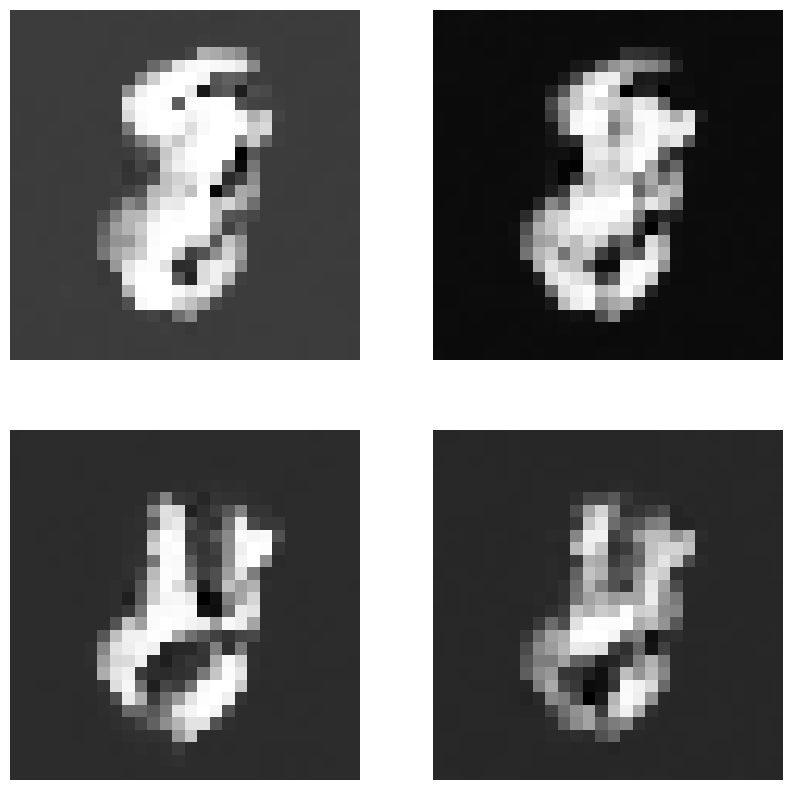

In [20]:
n_col = 2
n_row = 2
samples = n_col + n_row
# Generate fake images to visualize progress
noise = np.random.normal(0, 1, (samples, latent_dim))
fake_images = generator.predict(noise,verbose=False)

# Plot the fake images
plt.figure(figsize=(10, 10))
for i in range(samples):
    plt.subplot(n_row,n_col, i + 1)
    plt.imshow(fake_images[i, :, :, 0], cmap='gray')
    plt.axis('off')


# Change the archictecture to be able to select the digit

https://www.kaggle.com/code/zhoulingyan0228/generating-mnist-gan

In [ ]:
def generator_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape=(100,)),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(28 * 28 * 1, activation='tanh'),
        tf.keras.layers.Reshape((28, 28, 1))
    ])

    return model

generator = generator_model()

# Compiling the generator
generator.compile(loss='binary_crossentropy', optimizer='adam')

generator.summary()